In [44]:
#https://stackoverflow.com/questions/59831211/neighbours-of-a-cell-in-matrix-pytorch
import torch.nn.functional as nnf

def mean_filter(x_bchw):
    """
    Calculating the mean of each 3x3 neighborhood.
    input:
    - x_bchw: input tensor of dimensions batch-channel-height-width
    output:
    - y_bchw: each element in y is the average of the 9 corresponding elements in x_bchw
    """
    # define the filter
    box = torch.ones((3, 3), dtype=x_bchw.dtype, device=x_bchw.device, requires_grad=False)  
    box = box / box.sum()
    box = box[None, None, ...].repeat(x_bchw.size(1), 1, 1, 1)
    # use grouped convolution - so each channel is averaged separately.  
    y_bchw = nnf.conv2d(x_bchw, box, padding=1, groups=x_bchw.size(1))
    return y_bchw

In [45]:
def visualize_array(array,alpha=0.8):
    fig, ax = plt.subplots()
    return ax.imshow(array, interpolation='none', alpha=alpha)

In [46]:
from matplotlib import pyplot as plt

In [47]:
import torch

In [87]:
ones = torch.ones(2,2)

In [88]:
ones

tensor([[1., 1.],
        [1., 1.]])

In [89]:
t = torch.zeros(10,10)

In [90]:
x=6
y=6

In [91]:
t[x:x+2,y:y+2] = ones

In [92]:
x=7
y=7

In [93]:
t[x:x+2,y:y+2] = ones

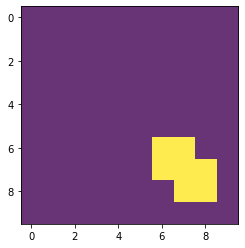

In [94]:
visualize_array(t)

In [95]:
def extrapolate(t,factor):
    t     = torch.Tensor(t)
    t     = t.unsqueeze(0)
    t     = torch.nn.functional.upsample(t, scale_factor=factor)
    t     = t.squeeze(0).T.unsqueeze(0)
    t     = torch.nn.functional.upsample(t, scale_factor=factor)
    return  t.squeeze(0).T

In [96]:
tt = extrapolate(t,1.5)

In [97]:
t.shape

torch.Size([10, 10])

In [98]:
tt.shape

torch.Size([15, 15])

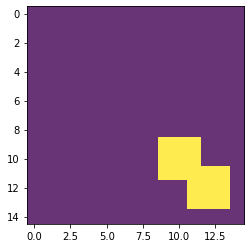

In [99]:
visualize_array(tt)

In [101]:
tt.shape

torch.Size([15, 15])

In [102]:
t.shape

torch.Size([10, 10])

In [81]:
ttt = 

In [85]:
ttt

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

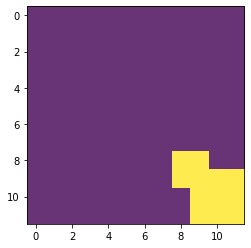

In [83]:
visualize_array(ttt)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [61]:
import numpy as np

In [68]:
#export
def crop_center_arr(arr,shape):
    left  = int((arr.shape[1]-shape[1])/2)
    right =      left+shape[1]  
    up    = int((arr.shape[0]-shape[0])/2)
    down  =        up+shape[0] 
    return arr[left:right, up:down]

In [69]:
crop_center_arr(tt,t.shape)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [175]:
def expand_boundaries(t,times=1):
    t = t[None, None, ...].repeat(t.size(1), 1, 1, 1)
    for _ in range(times):
        t = mean_filter(t)
        t[t>0] = 1
    return t[0,0,:]

In [182]:
expand_boundaries(t,2)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [112]:
t.shape

torch.Size([10, 1, 10, 10])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])